In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

# **QUALITATIVE ANALYSIS OF TWEETS ON VACCINATION** 

A project geared towards a qualitative analysis of historical data from Twitter on Vaccination.
by Dr William Kane Olwit

## **WHY SHOULD WE BE CONCERNEDABOUT TWEETS ON VACCINATION?**

### **The fatal impact of vaccine hesitancy**

In 2018, there were over 82,000 cases of measles confirmed in the EU – three times more than in 2017 – and measles led to 72 deaths. Cases of measles are affecting all unvaccinated groups, adults and children alike, with large numbers of cases and fatalities in countries which had previously eliminated the disease.
Vaccine hesitancy is a key reason for this worrying trend. Europe is the most vaccine-hesitant region in the world, and we are now witnessing the results. Last year’s wide-ranging survey of vaccine confidence in Europe, led by Heidi Larson and her colleagues from the Vaccine Confidence Project, found that the picture in the EU is complex with varying levels of vaccine confidence between countries.

### **The role of social media**

At the core of social media is the ability for us to share ideas and content with our peers. While this freedom of information is what makes social media so appealing, it is also what can make it dangerous. Social media is not the cause of vaccine hesitancy, but it has certainly played a role in making anti-vaccination arguments and pseudoscience accessible to a wider audience.

### **Data Gathering:**

We collected all tweets containing  the search string: vaccination. Along with the tweet text, we downloaded the date and time when the tweet was published, and the location of the user (if provided). We also downloaded the user id, follower ids, and friends ids. The followers of a user A are those users who will receive messages from user A. The friends of a user A are those users from whom user A receives messages. Thus, information flows from a user to his followers. We collected tweets using the open source information tool, TWINT.(https://github.com/twintproject) and a python algorithm.

In contrast to the open Twitter Search API, which only allows one to query tweets posted within the last seven days, Twint makes it possible to collect a much larger sample of Twitter posts, ranging several years. We queried Twint for different key terms that relate to the topic of vaccination ranging from the year 2006 to 30th of November 2019 and stored in an aggregated CSV file.



# **Loading Libraries**

In [ ]:
import re # for regular expressions
import pandas as pd 
pd.set_option("display.max_colwidth", 200)
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk # for text manipulation
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline


Let's read train and test datasets

In [ ]:
df = pd.read_csv("../input/twitter-vaccination-dataset/vaccination2.csv")

## **Text PreProcessing and Cleaning**
### **Data Inspection** 

Let's check out  tweets.

In [ ]:
print('Dataset size:',df.shape)
print('Columns are:',df.columns)

The dataset has 89,973 rows and 31 columns.

From our case we are only interested in the `tweet`, `hashtags` and `date` columns. We shall drop the rest for now.

In [ ]:
# use the drop columns function to streamline the dataset
df = df.drop(columns=['id', 'time','user_id','username','conversation_id','created_at','timezone', 'name', 'place', 'mentions', 'urls', 'photos', 'replies_count', 'likes_count', 'cashtags', 'link', 'retweet','retweets_count', 'quote_url', 'video', 'near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date'])
df.head(10)

In [ ]:
print('Dataset size:',df.shape)
print('Columns are:',df.columns)
df.info()

In [ ]:
#convert data to datetime and strings for manipulation.
df["tweet"]= df["tweet"].astype(str)
df['date']= pd.to_datetime(df['date'], infer_datetime_format=True)
df.info()

### We will only work on a sample of the dataset to make the execeution run quicker (10% Of the total dataset)

In [ ]:
df = df.sample(frac=.1, random_state=1111)

## Data Pre-processing

The preprocessing of the text data is an essential step as it makes the raw text ready for mining, i.e., it becomes easier to extract information from the text and apply machine learning algorithms to it. If we skip this step then there is a higher chance that you are working with noisy and inconsistent data. The objective of this step is to clean noise those are less relevant to find the sentiment of tweets such as punctuation, special characters, numbers, and terms which don’t carry much weightage in context to the text.

### Characteristic features of Tweets 

From the perspective of Sentiment
Analysis, we discuss a few characteristics of Twitter:

**Length of a Tweet**
     The maximum length of a Twitter message is 140 characters. This means that we can practically consider a tweet to be a single sentence, void of complex grammatical constructs. This is a vast difference from traditional subjects of Sentiment Analysis, such as movie reviews. 
     
**Language used**
     Twitter is used via a variety of media including SMS and mobile phone apps. Because of this and the 140-character limit, language used in Tweets tend be more colloquial, and filled with slang and misspellings. Use of hashtags also gained popularity on Twitter and is a primary feature in any given tweet. 
     
**Data availability**
     Another difference is the magnitude of data available. With the Twitter API, it is easy to collect millions of tweets for training. There also exist a few datasets that have automatically and manually labelled the tweets. 
     
**Domain of topics**
     People often post about their likes and dislikes on social media. These are not all concentrated around one topic. 

### Cleaning The Data
When dealing with numerical data, data cleaning often involves removing null values and duplicate data, dealing with outliers, etc. With text data, there are some common data cleaning techniques, which are also known as text pre-processing techniques.

With text data, this cleaning process can go on forever. There's always an exception to every cleaning step. So, we're going to follow the MVP (minimum viable product) approach - start simple and iterate. Here are a bunch of things you can do to clean your data. We're going to execute just the common cleaning steps here and the rest can be done at a later point to improve our results.

### Common data cleaning steps on all text:

Make text all lower case
Remove punctuation
Remove numerical values
Remove common non-sensical text (/n)
Tokenize text
Remove stop words
More data cleaning steps after tokenization:

Stemming / lemmatization
Parts of speech tagging
Create bi-grams or tri-grams
Deal with typos

### Specific Tweet oriented cleaning using the  tweet-preprocessor module

### A) Removing Twitter Handles (@user)

As mentioned above, the tweets contain lots of twitter handles (@user), that is how a Twitter user acknowledged on Twitter. We will remove all these twitter handles from the data as they don’t convey much information.

### B) Removing Punctuations,Links, Numbers, and Special Characters

As discussed, punctuations, numbers and special characters do not help much. It is better to remove them from the text just as we removed the twitter handles.

### C) Tokenization
Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.

### D) Stemming
Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word. For example, For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”.


In [ ]:
import string

import nltk
from nltk.corpus import stopwords
from nltk import re

MIN_YEAR = 1900
MAX_YEAR = 2100


def get_url_patern():
    return re.compile(
        r'(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))'
        r'[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9]\.[^\s]{2,})')


def get_emojis_pattern():
    try:
        # UCS-4
        emojis_pattern = re.compile(u'([\U00002600-\U000027BF])|([\U0001f300-\U0001f64F])|([\U0001f680-\U0001f6FF])')
    except re.error:
        # UCS-2
        emojis_pattern = re.compile(
            u'([\u2600-\u27BF])|([\uD83C][\uDF00-\uDFFF])|([\uD83D][\uDC00-\uDE4F])|([\uD83D][\uDE80-\uDEFF])')
    return emojis_pattern


def get_hashtags_pattern():
    return re.compile(r'#\w*')


def get_single_letter_words_pattern():
    return re.compile(r'(?<![\w\-])\w(?![\w\-])')


def get_blank_spaces_pattern():
    return re.compile(r'\s{2,}|\t')


def get_twitter_reserved_words_pattern():
    return re.compile(r'(RT|rt|FAV|fav|VIA|via)')


def get_mentions_pattern():
    return re.compile(r'@\w*')


def is_year(text):
    if (len(text) == 3 or len(text) == 4) and (MIN_YEAR < len(text) < MAX_YEAR):
        return True
    else:
        return False


class TwitterPreprocessor:

    def __init__(self, text: str):
        self.text = text

    def fully_preprocess(self):
        return self \
            .remove_urls() \
            .remove_mentions() \
            .remove_hashtags() \
            .remove_twitter_reserved_words() \
            .remove_punctuation() \
            .remove_single_letter_words() \
            .remove_blank_spaces() \
            .remove_stopwords() \
            .remove_numbers()

    def remove_urls(self):
        self.text = re.sub(pattern=get_url_patern(), repl='', string=self.text)
        return self

    def remove_punctuation(self):
        self.text = self.text.translate(str.maketrans('', '', string.punctuation))
        return self

    def remove_mentions(self):
        self.text = re.sub(pattern=get_mentions_pattern(), repl='', string=self.text)
        return self

    def remove_hashtags(self):
        self.text = re.sub(pattern=get_hashtags_pattern(), repl='', string=self.text)
        return self

    def remove_twitter_reserved_words(self):
        self.text = re.sub(pattern=get_twitter_reserved_words_pattern(), repl='', string=self.text)
        return self

    def remove_single_letter_words(self):
        self.text = re.sub(pattern=get_single_letter_words_pattern(), repl='', string=self.text)
        return self

    def remove_blank_spaces(self):
        self.text = re.sub(pattern=get_blank_spaces_pattern(), repl=' ', string=self.text)
        return self

    def remove_stopwords(self, extra_stopwords=None):
        if extra_stopwords is None:
            extra_stopwords = []
        text = nltk.word_tokenize(self.text)
        stop_words = set(stopwords.words('english'))

        new_sentence = []
        for w in text:
            if w not in stop_words and w not in extra_stopwords:
                new_sentence.append(w)
        self.text = ' '.join(new_sentence)
        return self

    def remove_numbers(self, preserve_years=False):
        text_list = self.text.split(' ')
        for text in text_list:
            if text.isnumeric():
                if preserve_years:
                    if not is_year(text):
                        text_list.remove(text)
                else:
                    text_list.remove(text)

        self.text = ' '.join(text_list)
        return self

    def lowercase(self):
        self.text = self.text.lower()
        return self

In [ ]:
# Clean tweets and append to new column
tweets = df['tweet']
clean_tweets = []
for tweet in tweets:
    c = TwitterPreprocessor((tweet))
    c.fully_preprocess()
    c = c.text
    clean_tweets.append(c)
    
df['clean_tweets'] = clean_tweets 
df.head(5)

## **Story Generation and Visualization from Tweets**
### **A) Understanding the common words used in the tweets: WordCloud**

Now we want to understand the common words by plotting wordclouds.

A wordcloud is a visualization wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes.

Let’s visualize all the words our data using the wordcloud plot.

In [ ]:

all_words = ' '.join([text for text in df['clean_tweets']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## **Sentiment Analysis Using VADER**

Creating your own sentiment analysis model from scratch can be very difficult and tedious for a few reason. You need to find relevant data to your problem, create a LOT of labeled data for training, and you must perform data clean up and NLP pre-processing. Luckily for us, VADER is a readily available pre-trained sentiment analysis that thrives on social media data. 
Some of the big advantages include:
1. Analysis of polarity (positive or negative sentiment) as well as valence (intensity of the sentiment — i.e. ‘excellent’ has a higher intensity than ‘good’).
2. Handles slang (‘lol’, ‘sux’) and emojis, which are prevalent in tweets
3. Accounts for capital letters and punctuation (i.e. ‘GOOD!!’ is more positive than ‘good’)

For more information on VADER you can access the [github repository](https://github.com/cjhutto/vaderSentiment) or the [paper written by the authors](http://comp.social.gatech.edu/papers/icwsm14.vader.hutto.pdf). 
For other sentiment analysis tools you can check out this [github page.](https://github.com/laugustyniak/awesome-sentiment-analysis).

The first analysis we are going to do is to plot a histogram of all of the sentiment scores we collected on our tweets. 


In [ ]:
import nltk
nltk.download("vader_lexicon")

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
# create analyzer object 
analyzer = SentimentIntensityAnalyzer()

# get a list of scores and plot
scores = [analyzer.polarity_scores(tweet)['compound'] for tweet in df['clean_tweets']]
plt.hist(scores, bins=20)

VADER gives back 4 types of polarity scores for every call: Positive, negative, neutral or compound. 

In our code, we only consider the compound score  which is a combination of the other three plus some additional rules and a normalization between -1 and 1. 

One thing to notice from our histogram is that many tweets have a neutral score, and there are only slightly more negative ones in this sample.


In [ ]:
sentiment = df['clean_tweets'].apply(lambda x: analyzer.polarity_scores(x))
df = pd.concat([df,sentiment.apply(pd.Series)],1)
df.head(5)

## Analyzing Sentiment
First let’s just call `df.describe()` and get some basic information on our dataset now .

In [ ]:
df.describe()

Looking at the compound score we can see on average tweets are neutral, with a mean sentiment of .001.

Plotting this data will give us a better idea of what it looks like. Before we plot we make a few changes to the dataframe for ease of use, sorting all the values by timestamp so they’re in order, copying the timestamp to the index to make graphing easier, and calculating an expanding and rolling mean for compound sentiment scores.

In [ ]:
df.index = pd.to_datetime(df['date'])
df = df.sort_index()
df['mean'] = df['compound'].expanding().mean()
df['rolling'] = df['compound'].rolling('1d').mean()

Now using matplotlib, with import matplotlib.pyplot as plt, we can create a quick chart of our tweets and their sentiment over time.

In [ ]:
import datetime as dt

fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
ax.scatter(df['date'],df['compound'], label='Tweet Sentiment')
ax.plot(df['date'],df['rolling'], color ='r', label='Rolling Mean')
ax.plot(df['date'],df['mean'], color='g', label='Expanding Mean')
#ax.set_xlim([dt.date(2019,6,15),dt.date(2019,10,15)])
ax.set(title='Vaccination Tweets over Time', xlabel='Date', ylabel='Sentiment')
ax.legend(loc='best')
fig.tight_layout()
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show()

Let’s try to tackle things one at a time here. First let’s look at those tweets with a sentiment of 0. Seborn’s distplot is a quick way to see the distribution of sentiment scores across our tweets.

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.set(title='Vaccination Tweets Sentiment Score', xlabel='Compund Sentiment Score', ylabel='Frequency')
sns.distplot(df['compound'], bins=15, ax=ax)
plt.show()

Let’s see if we can get a little bit clearer picture of our sentiment over time. 

Overall our data is noisy, there is just too much of it. 
Taking a sample of our data might make it easier to see the trends happening. 
We’ll use pandas sample() function to retain just a tenth of our 89,973 tweets.

In [ ]:
ot = df.sample(frac=.05, random_state=1111)
ot.sort_index(inplace=True)

ot['mean'] = ot['compound'].expanding().mean()
ot['rolling'] = ot['compound'].rolling('1d').mean()

fig = plt.figure(figsize=(30,5))
ax = fig.add_subplot(111)
ax.scatter(ot['date'],ot['compound'], label='Tweet Sentiment')
ax.plot(ot['date'],ot['rolling'], color ='r', label='Rolling Mean')
ax.plot(ot['date'],ot['mean'], color='g', label='Expanding Mean')
ax.set(title='Vaccination Tweets over Time', xlabel='Date', ylabel='Sentiment')
ax.legend(loc='best')
fig.tight_layout()
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show()

In [ ]:
#save cleaned dataset with sentiment appended
#df.to_csv('/kaggle/working/df_cleaned_sent.csv',index=False)


###  Understanding the impact of Hashtags on tweets sentiment

In [ ]:
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags


In [ ]:
# extracting hashtags from neutral tweets

HT_neutral = hashtag_extract(df['hashtags'][df['compound'] == 0])

# extracting hashtags from negative tweets
HT_negative = hashtag_extract(df['hashtags'][df['compound'] < 0])

# extracting hashtags from positive tweets
HT_positive = hashtag_extract(df['hashtags'][df['compound'] > 0])

# unnesting list
HT_neutral = sum(HT_neutral,[])
HT_negative = sum(HT_negative,[])
HT_positive = sum(HT_positive,[])

**Neutral Tweets**

In [ ]:
a = nltk.FreqDist(HT_neutral)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show()

Negative tweets

In [ ]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})

# selecting top 20 most frequent hashtags     
e = e.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show()

Positive Tweets

In [ ]:
c = nltk.FreqDist(HT_positive)
f = pd.DataFrame({'Hashtag': list(c.keys()), 'Count': list(c.values())})

# selecting top 20 most frequent hashtags     
f = f.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=f, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show()

## **Topic Model Analysis**

Topic Modeling (TM) consists of finding the information contained in textual documents (information retrieval in English) and presenting it in the form of themes (depending on the technique used, the relative importance of the themes can also be found ).

TM is therefore an unsupervised technique for classifying documents in multiple themes (Unsupervised Learning in English).

From the point of view of the representation space, the TM is a reduction of dimensions in the vector representation of a document : instead of representing a document of a corpus by a vector in the space of the words composing the vocabulary of this corpus is represented by a vector in the space of the themes of this corpus , each value of this vector corresponding to the relative importance of the theme in this document. 

### **Latent Dirichlet Allocation**

Latent Dirichlet Allocation (LDA) is one example of a topic model used to extract topics from a document. LDA is an unsupervised machine learning algorithm that allows a a set of textual observations to be explained by unobserved groups that explain similarities within the data. LDA represents documents as mixtures of topics that spit out words with certain probabilities.

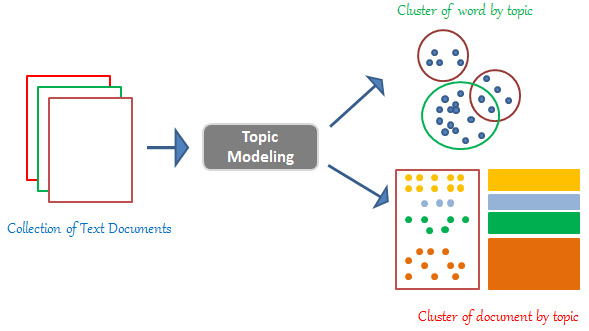



In [ ]:
import sys
# !{sys.executable} -m spacy download en
import re, numpy as np, pandas as pd
from pprint import pprint

# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel

# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])


## Tokenize Sentences and Clean
Removing new line characters, single quotes and finally split the sentence into a list of words using gensim’s `simple_preprocess()`. Setting the `deacc=True` option removes punctuations.

In [ ]:
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', sent) 
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  


In [ ]:
# Convert to list
data = df.clean_tweets.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1])

## Build the Bigram, Trigram Models and Lemmatize
Let’s form the bigram and trigrams using the Phrases model. This is passed to Phraser() for efficiency in speed of execution.

Next, lemmatize each word to its root form, keeping only nouns, adjectives, verbs and adverbs.

We keep only these POS tags because they are the ones contributing the most to the meaning of the sentences. Here, we use `spacy` for lemmatization.

In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load('en', disable=['parser', 'ner'])
    for tweet in texts:
        doc = nlp(" ".join(tweet)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(data_words)  # processed Tweet Data!

In [ ]:
data_ready[:5]

## **Build the Topic Model**
To build the LDA topic model using LdaModel(), you need the corpus and the dictionary. Let’s create them first and then build the model. The trained topics (keywords and weights) are printed below as well.

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

print(lda_model.print_topics())

## **What is the Dominant topic and its percentage contribution in each document**

In LDA models, each document is composed of multiple topics. But, typically only one of the topics is dominant. The below code extracts this dominant topic for each sentence and shows the weight of the topic and the keywords in a nicely formatted output.

This way, we will know which document belongs predominantly to which topic.

In [ ]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    tweet_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                tweet_topics_df = tweet_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    tweet_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    tweet_topics_df = pd.concat([tweet_topics_df, contents], axis=1)
    return(tweet_topics_df)


df_topic_tweet_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

# Format
df_dominant_topic = df_topic_tweet_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Tweet']
df_dominant_topic.head(10)

## **The most representative sentence for each topic**

Sometimes you want to get samples of sentences that most represent a given topic. This code gets the most exemplar sentence for each topic.

In [ ]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

tweet_topics_sorteddf_mallet = pd.DataFrame()
tweet_topics_outdf_grpd = df_topic_tweet_keywords.groupby('Dominant_Topic')

for i, grp in tweet_topics_outdf_grpd:
    tweet_topics_sorteddf_mallet = pd.concat([tweet_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
tweet_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
tweet_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Tweet"]

# Show
tweet_topics_sorteddf_mallet.head(10)

## Frequency Distribution of Word Counts in Tweets
Let’s plot the tweet word counts distribution.

In [ ]:
doc_lens = [len(d) for d in df_dominant_topic.Tweet]

# Plot
plt.figure(figsize=(16,7), dpi=55)
plt.hist(doc_lens, bins = 100, color='navy')
#plt.text(50, 1000, "Mean   : " + str(round(np.mean(doc_lens))))
#plt.text(50,  2000, "Median : " + str(round(np.median(doc_lens))))
#plt.text(50,  3000, "Stdev   : " + str(round(np.std(doc_lens))))
#plt.text(50,  4000, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
#plt.text(50,  5000, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 50), ylabel='Number of Tweets', xlabel='Tweet Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,50,9))
plt.title('Distribution of Tweet Word Counts', fontdict=dict(size=22))
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(10,8), dpi=55, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Tweet]
    ax.hist(doc_lens, bins = 50, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 50), xlabel='Tweet Word Count')
    ax.set_ylabel('Number of Tweets', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,50,9))
fig.suptitle('Distribution of Tweet Word Counts by Dominant Topic', fontsize=22)
plt.show()

## Word Clouds of Top N Keywords in Each Topic

Though we’ve already seen what are the topic keywords in each topic, a word cloud with the size of the words proportional to the weight is a pleasant sight. The coloring of the topics we’ve taken here is followed in the subsequent plots as well.

In [ ]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(7,7), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

## Word Counts of Topic Keywords
When it comes to the keywords in the topics, the importance (weights) of the keywords matters. Along with that, how frequently the words have appeared in the tweets is also interesting to look.

Let’s plot the word counts and the weights of each keyword in the same chart.

We want to keep an eye out on the words that occur in multiple topics and the ones whose relative frequency is more than the weight. Often such words turn out to be less important. The chart we’ve drawn below is a result of adding several such words to the stop words list in the beginning and re-running the training process.

In [ ]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df_topics = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(10,8), sharey=True, dpi=75)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df_topics.loc[df_topics.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df_topics.loc[df_topics.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.050); ax.set_ylim(0, 1000)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df_topics.loc[df_topics.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

## Sentence Chart Colored by Topic

Each word in the document is representative of one of the 4 topics. Let’s color each word in the given documents by the topic id it is attributed to.
The color of the enclosing rectangle is the topic assigned to the document.

In [ ]:
# Sentence Coloring of N Sentences
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=lda_model, corpus=corpus, start = 0, end = 13):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=70)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart()    

## What are the most discussed topics in the documents?

Let’s compute the total number of documents attributed to each topic.

In [ ]:
# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)            

# Distribution of Dominant Topics in Each Document
df_dominant = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df_dominant.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

**Let’s make two plots:**

1. The number of documents for each topic by assigning the document to the topic that has the most weight in that document.
2. The number of documents for each topic by by summing up the actual weight contribution of each topic to respective documents.

In [ ]:
from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=75, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Tweets by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Tweets')
ax1.set_ylim(0, 5000)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Tweets by Topic Weightage', fontdict=dict(size=10))

plt.show()

## t-SNE Clustering Chart
Let’s visualize the clusters of documents in a 2D space using t-SNE (t-distributed stochastic neighbor embedding) algorithm.

In [ ]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
# n-1 rows each is a vector with i-1 posisitons, where n the number of documents
# i the topic number and tmp[i] = probability of topic i

topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])
    
# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

## pyLDAVis

Finally, pyLDAVis is the most commonly used and a nice way to visualise the information contained in a topic model. Below is the implementation for `LdaModel()`.

In [ ]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis